MNIST contain (70000,28,28,1) - 70000 samples , 28*28 px, 1 channel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

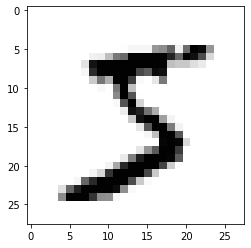

In [6]:
plt.imshow(single_image,cmap='Greys')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

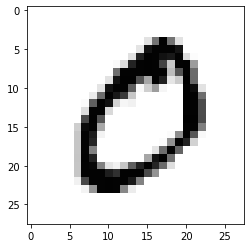

In [8]:
single_image = x_train[1]
plt.imshow(single_image,cmap='Greys')

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_test = to_categorical(y_test,num_classes=10 )

In [11]:
y_cat_train = to_categorical(y_train,num_classes=10 )

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
#width,height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [15]:
x_test = x_test.reshape(10000,28,28,1)

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 input_shape=(28,28,1),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [21]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1356 - accuracy: 0.9591 - val_loss: 0.0636 - val_accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0452 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0364 - val_accuracy: 0.9875
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0371 - val_accuracy: 0.9872


In [24]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

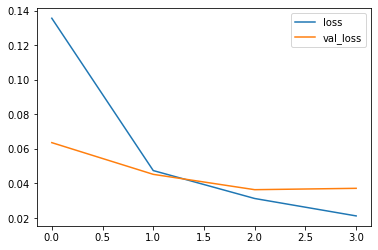

In [26]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

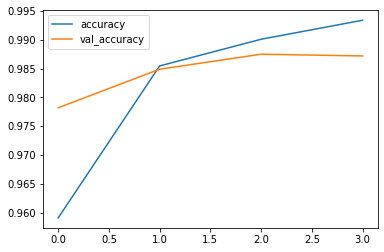

In [29]:
metrics[['accuracy','val_accuracy']].plot()

In [30]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.037149470299482346, 0.9872000217437744]

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
my_num = x_test[0]

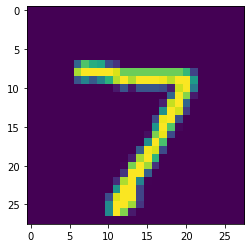

In [46]:
plt.imshow(my_num)

In [48]:
model.predict_classes(my_num.reshape(1,28,28,1))

array([7], dtype=int64)